<a href="https://colab.research.google.com/github/Josue1099/DATA-ANA-BEDU-24/blob/main/LA_crime_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

import seaborn as sns


In [17]:
df =pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442206 entries, 0 to 442205
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           442206 non-null  int64  
 1   Date Rptd       442206 non-null  object 
 2   DATE OCC        442206 non-null  object 
 3   TIME OCC        442206 non-null  int64  
 4   AREA            442206 non-null  int64  
 5   AREA NAME       442206 non-null  object 
 6   Rpt Dist No     442206 non-null  int64  
 7   Part 1-2        442206 non-null  int64  
 8   Crm Cd          442206 non-null  int64  
 9   Crm Cd Desc     442206 non-null  object 
 10  Mocodes         381337 non-null  object 
 11  Vict Age        442205 non-null  float64
 12  Vict Sex        384235 non-null  object 
 13  Vict Descent    384232 non-null  object 
 14  Premis Cd       442200 non-null  float64
 15  Premis Desc     442029 non-null  object 
 16  Weapon Used Cd  157728 non-null  float64
 17  Weapon Des

SESION 1 : Estimados de locacion y variabilidad

In [ ]:
#Encontrar la hora media en que se han cometido los crimenes:
Promedio_hora_crimen =df['TIME OCC'].mean()
print(f'La hora promedio en la cual se efectuan los crimenes es {Promedio_hora_crimen}')

La hora promedio en la cual se efectuan los crimenes es 1313.0644493177388


In [ ]:
#Calcular el area con mayor incidencias de crimen
Lugar_con_mayor_crimen =df['AREA NAME'].mode()[0]
print(f'El area con mayor incidencias de crimen es {Lugar_con_mayor_crimen}')

El area con mayor incidencias de crimen es 77th Street


In [16]:
#El crimen con mayor incidencia
Tipo_de_crimen =df['Crm Cd Desc'].mode()[0]
print(f'El crimen con mayor incidencia es {Tipo_de_crimen}')

El crimen con mayor incidencia es VEHICLE - STOLEN


SESION 2: Visualizacion de datos : distribuciones


Original DataFrame:
                Date Rptd
0  03/01/2020 12:00:00 AM
1  02/09/2020 12:00:00 AM
2  11/11/2020 12:00:00 AM
3  05/10/2023 12:00:00 AM
4  08/18/2022 12:00:00 AM
5  05/13/2020 12:00:00 AM
6  01/24/2020 12:00:00 AM
7  06/07/2020 12:00:00 AM
8  10/08/2020 12:00:00 AM
9  04/21/2020 12:00:00 AM

DataFrame con fechas convertidas:
   Date Rptd
0 2020-03-01
1 2020-02-09
2 2020-11-11
3 2023-05-10
4 2022-08-18
5 2020-05-13
6 2020-01-24
7 2020-06-07
8 2020-10-08
9 2020-04-21


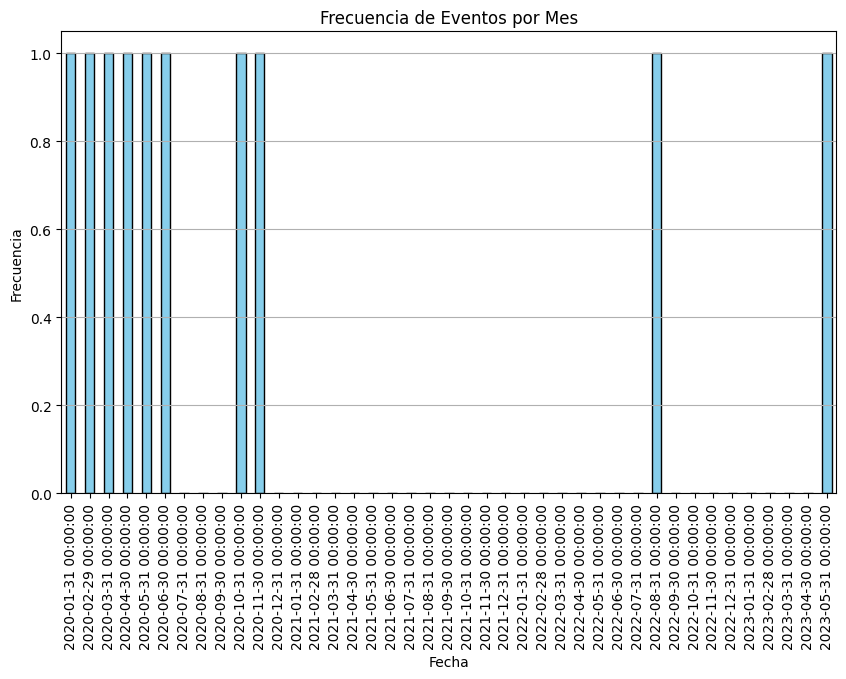

In [ ]:
# Crear un DataFrame con la fechas de la columna Date Rptd
data = {
    'Date Rptd': [
        '03/01/2020 12:00:00 AM',
        '02/09/2020 12:00:00 AM',
        '11/11/2020 12:00:00 AM',
        '05/10/2023 12:00:00 AM',
        '08/18/2022 12:00:00 AM',
        '05/13/2020 12:00:00 AM',
        '01/24/2020 12:00:00 AM',
        '06/07/2020 12:00:00 AM',
        '10/08/2020 12:00:00 AM',
        '04/21/2020 12:00:00 AM'
    ]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


# Convertir la columna a formato datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
print("\nDataFrame con fechas convertidas:")
print(df)

# Extraer solo la fecha en formato YYYY-MM-DD
df['Date Rptd'] = df['Date Rptd'].dt.strftime('%Y-%m-%d')

# Convertir la columna de fecha a tipo datetime nuevamente para agrupar por meses
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df.set_index('Date Rptd', inplace=True)

# Agrupar por mes y contar la frecuencia
monthly_counts = df.resample('M').size()

# Crear la gráfica de histograma
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Configurar los títulos y las etiquetas
plt.title('Frecuencia de Eventos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

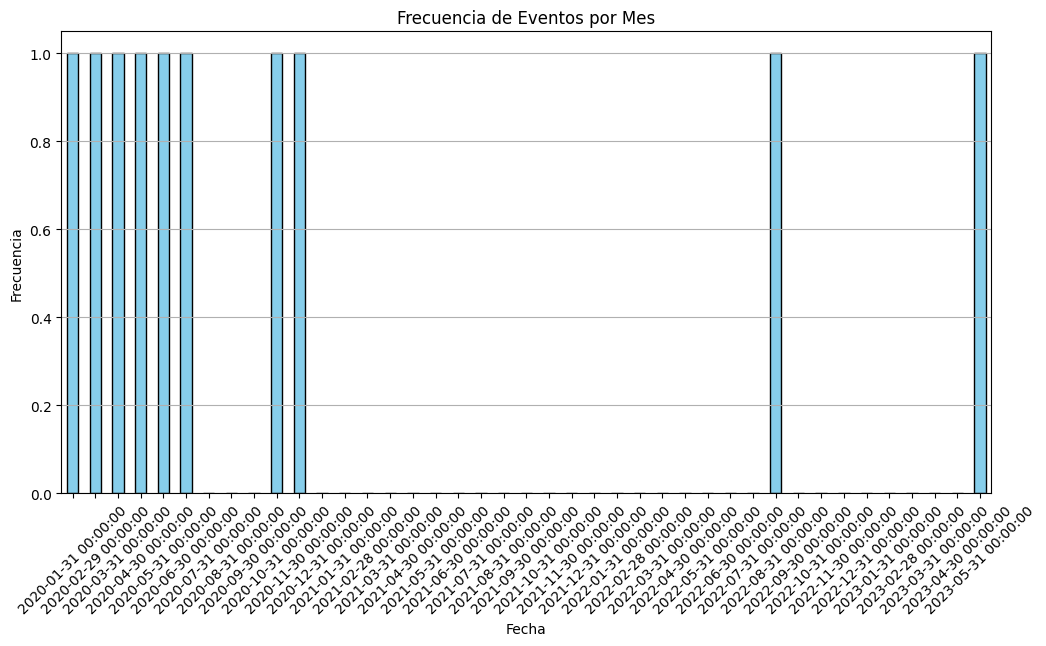

In [ ]:

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Eventos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()

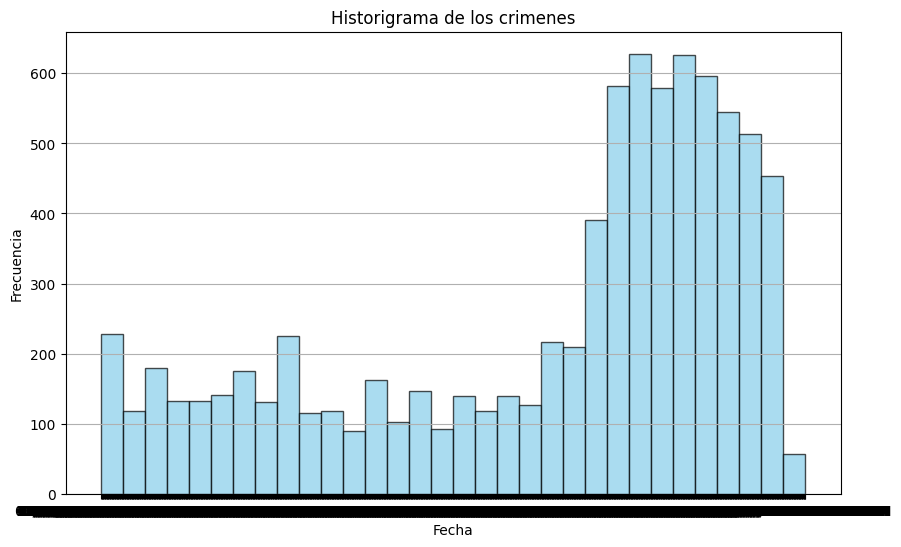

In [ ]:
#Graficar el historigrama de los crimenes
plt.figure(figsize=(10,6))
plt.hist(df['Date Rptd'],bins=32, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Historigrama de los crimenes')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

In [ ]:

#Agrupar por Año y Mes
plt.figure.figsize=(10,6)
count.plot(kind='bar',color ='skyblue',edgecolor='black', alpha=0.7)
plt.title('Crimenes por Año y Mes')
plt.xlabel('Año y Mes')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()



NameError: name 'count' is not defined

In [ ]:
#Generar distribucion normal.
def generar_distribucion(data, titulo):
    # Calcular asimetría y curtosis
    asimetria = skew(data)
    curtosis = kurtosis(data)

    # Crear el histograma
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=32, color='skyblue', edgecolor='black', alpha=0.7)

    # Configurar los títulos y las etiquetas
    plt.title(f'{titulo}\nAsimetría: {asimetria:.2f}, Curtosis: {curtosis:.2f}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')

    # Mostrar el histograma
    plt.show()

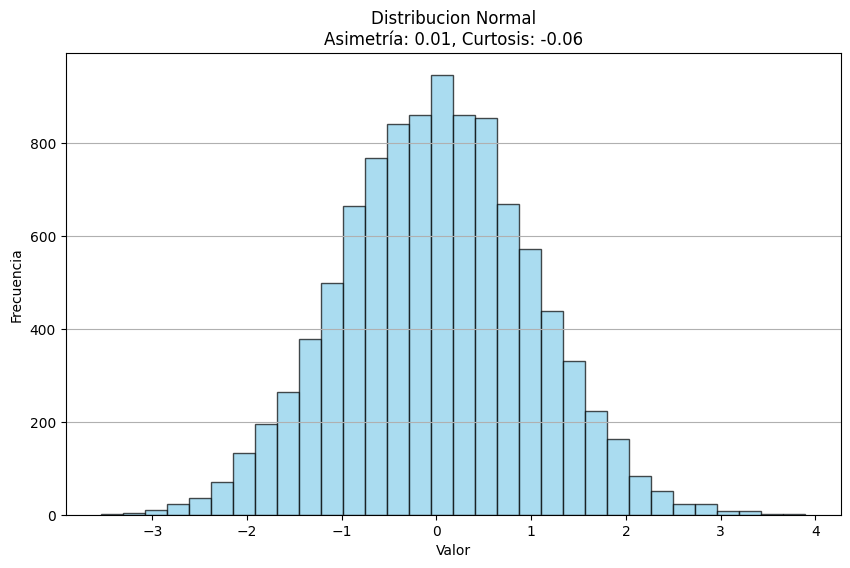

In [ ]:
mu, sigma= 0,1
dist_normal =np.random.normal(mu, sigma, 10000)
generar_distribucion(dist_normal,'Distribucion Normal')

In [ ]:
SESION 5:Calculo Error estandar

In [ ]:
#Calcular una media de los costos
df =pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')
df.head()
Edad_promedio = df['Vict Age'].mean()
print(f'la edad promedio de los crimenes es {Edad_promedio}')



la edad promedio de los crimenes es 30.257309941520468


In [ ]:
#Calcular la desviacion estandar de la edad promedio dlas vitimas de crimen
desviacion_estandar =df['Vict Age'].std()
print(f'La desviacion estandar de la edad promedio de las victimas de crimen es {round(desviacion_estandar,2)}')

La desviacion estandar de la edad promedio de las victimas de crimen es 21.66


In [ ]:
#Calcular eel tamaño de la muestra
n =len(df['Vict Age'])
print(f'El tamaño de la muestra es {n}')

El tamaño de la muestra es 8208


In [ ]:
#calcular el error estandar
error_estandar =desviacion_estandar/np.sqrt(n)
print(f'El error estndar:{error_estandar }')

El error estndar:0.23904134607012328


In [ ]:
#Calcular una media de los costos
df =pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')
df.head()
Edad_promedio = df['Vict Age'].mean()
print(f'la edad promedio de los crimenes es {Edad_promedio}')

#Calcular la desviacion estandar de la edad promedio dlas vitimas de crimen
desviacion_estandar =df['Vict Age'].std()
print(f'La desviacion estandar de la edad promedio de las victimas de crimen es {round(desviacion_estandar,2)}')
#Calcular eel tamaño de la muestra
n =len(df['Vict Age']).dropna()
print(f'El tamaño de la muestra es {n}')


#calcular el error estandar
error_estandar =desviacion_estandar/np.sqrt(n)
print(f'El error estandar:{round(error_estandar,2)}')

#color de la figura
sns.set(style='whitegrid')
#Crear un historigrama de la edad con la distribucion normal superpuesta
plt.figure(figsize=(10,6))
sns.histplot(['Vict age'],kde=True, color = 'green',stat= 'density', bins=30)
#Agregar linea de la media
Edad_promedio = df['Vict Age'].mean()
plt.axvline(Edad_promedio,color='purple',linestyle='--', label=f'Media: {round(Edad_promedio, 2)}')



# Añadir etiquetas y título
plt.title('Distribución de edad de victimas con media y error estandar')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

la edad promedio de los crimenes es 30.257309941520468
La desviacion estandar de la edad promedio de las victimas de crimen es 21.66


AttributeError: 'int' object has no attribute 'dropna'

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                

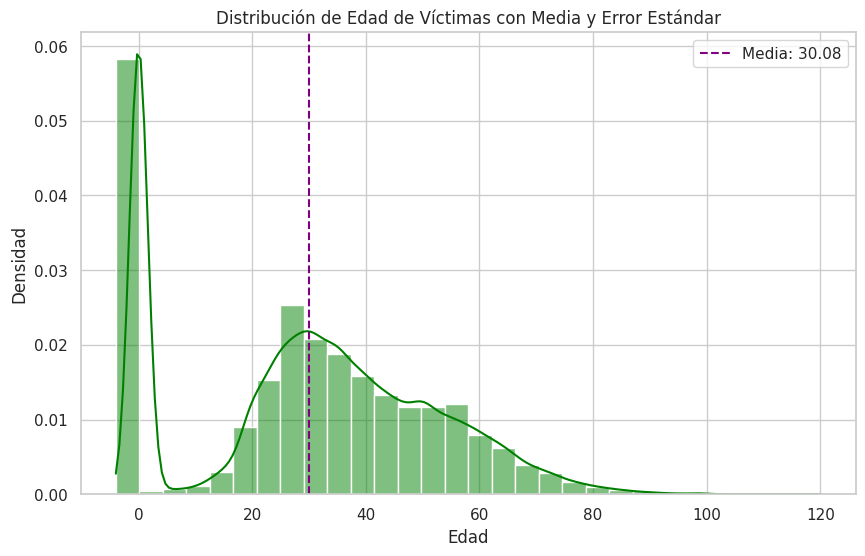

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())

# Calcular la edad promedio de las víctimas
Edad_promedio = df['Vict Age'].mean()
print(f'La edad promedio de los crímenes es {Edad_promedio}')

# Calcular la desviación estándar de la edad
desviacion_estandar = df['Vict Age'].std()
print(f'La desviación estándar de la edad de las víctimas de crimen es {round(desviacion_estandar, 2)}')

# Calcular el tamaño de la muestra
n = len(df['Vict Age'].dropna())
print(f'El tamaño de la muestra es {n}')

# Calcular el error estándar
error_estandar = desviacion_estandar / np.sqrt(n)
print(f'El error estándar es: {round(error_estandar, 2)}')

# Configurar el estilo de la figura con seaborn
sns.set(style='whitegrid')

# Crear un histograma de la edad con la distribución normal superpuesta
plt.figure(figsize=(10, 6))
sns.histplot(df['Vict Age'].dropna(), kde=True, color='green', stat='density', bins=30)

# Agregar línea de la media
plt.axvline(Edad_promedio, color='purple', linestyle='--', label=f'Media: {round(Edad_promedio, 2)}')

# Añadir etiquetas y título
plt.title('Distribución de Edad de Víctimas con Media y Error Estándar')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()